In [1]:
%matplotlib inline

from collections import defaultdict
from pathlib import Path

from cycler import cycler
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib as mpl

plt.style.use('presentation')

mpl.rcParams['figure.figsize'] = (9, 6)

In [2]:
c_to_co2 = 3.7  # 1 ton carbon = 3.7 tons CO2

# 1000 Pg = 1 Tt (t = metric ton)

# Matthews et al 2009 defined carbon climate response (CCR)
# but it's now more frequently referred to as 
# transient climate response to cumulative carbon emissions (TCRE)

# Mat2009 presented "best", 5%, and 95% confidence intervals
tcre_mat2009 = pd.Series(
    [1.5, 1.0, 2.1, 0.3], 
    index=['best', 'low', 'high', '1sigma']
)

tcre_tons_co2_mat2009 = tcre_mat2009 / 1e12 / c_to_co2  # degrees C per ton CO2
tcre_tons_co2_mat2009

best      4.054054e-13
low       2.702703e-13
high      5.675676e-13
1sigma    8.108108e-14
dtype: float64

In [3]:
# IPCC 2013 Chapter 12 pg 1108 summarizes a few estimates of CCR
# "Expert judgement based on the available evidence therefore 
#  suggests that the TCRE is *likely* between 0.8°C to 2.5°C per 
#  1000 PgC, for cumulative CO2 emissions less than about  
#  2000 PgC until the time at which temperature peaks."
# high and low are supposedly +/- 1 std dev

tcre_ipcc2013 = pd.Series(
    [1.65, 0.8, 2.5, 0.85],
    index=['best', 'low', 'high', '1sigma']
)

tcre_tons_co2_ipcc2013 = tcre_ipcc2013 / 1e12 / c_to_co2  # degrees C per ton CO2
tcre_tons_co2_ipcc2013

best      4.459459e-13
low       2.162162e-13
high      6.756757e-13
1sigma    2.297297e-13
dtype: float64

In [4]:
# From Rogelj (2019) as documented in the 2020 supplementary material revision 
# Nominally the same as IPCC 2013 but uncertainty is half as much and values
# a few % different

tcre_Tt_co2_rogelj2019 = pd.Series(
    [0.4503, 0.3483, 0.5524],
    index=['best', 'low', 'high']
)
tcre_Tt_co2_rogelj2019['1sigma'] = tcre_Tt_co2_rogelj2019['high'] - tcre_Tt_co2_rogelj2019['best']

tcre_tons_co2_rogel2019 = tcre_Tt_co2_rogelj2019 / 1e12  # degrees C per ton CO2
tcre_tons_co2_rogel2019

best      4.503000e-13
low       3.483000e-13
high      5.524000e-13
1sigma    1.021000e-13
dtype: float64

In [5]:
(tcre_tons_co2_rogel2019['1sigma'] / tcre_tons_co2_rogel2019['best']) ** 2

0.05140999838782932

In [6]:
metric_ton_to_short_ton = 1.10231  # 1 metric ton = 1.10231 short tons

In [7]:
root_path = Path('/Users/holmgren/Documents/Renewables/TEP/TEP 2019 Carbon/data')

In [8]:
path = root_path / 'Historic Generation and Emissions no links.xlsx'
tep_generation = pd.read_excel(
    path,
    sheet_name='generation',
    index_col=0
)

def process_raw_df(df):
    out = df.T
    index = pd.to_datetime(out.index.astype(int), format='%Y')
    out.index = index
    out = out.interpolate()
    return out

tep_generation = process_raw_df(tep_generation)

tep_generation

,Total Generation,Market Purchases,Non-Market Generation
2005-01-01,1.285352e+07,1638737.000,1.121479e+07
2006-01-01,1.346662e+07,1842800.500,1.162382e+07
2007-01-01,1.407971e+07,2046864.000,1.203285e+07
2008-01-01,1.481311e+07,3358577.000,1.145453e+07
2009-01-01,1.406939e+07,3572993.000,1.049640e+07
2010-01-01,1.341278e+07,2700709.000,1.071207e+07
2011-01-01,1.360960e+07,2556751.065,1.105285e+07
2012-01-01,1.343640e+07,2184176.867,1.125222e+07
2013-01-01,1.353066e+07,2032840.647,1.149781e+07
2014-01-01,1.364063e+07,2893612.981,1.074702e+07


Text(0, 0.5, 'TEP Generation (MWh)')

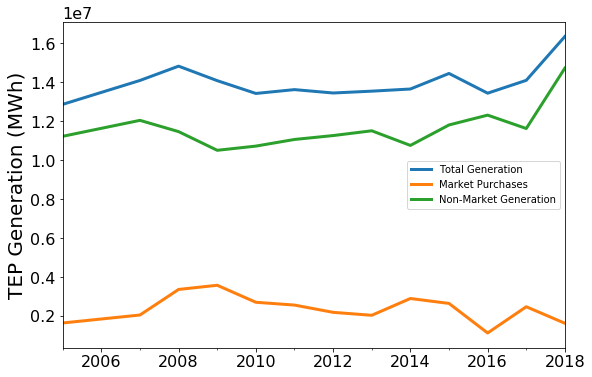

In [9]:
ax = tep_generation.plot()
ax.set_ylabel('TEP Generation (MWh)')

In [10]:
tep_emissions = pd.read_excel(
    path,
    sheet_name='emissions',
    index_col=0
)
tep_emissions = process_raw_df(tep_emissions)
tep_emissions

,Total Emissions,Market Emissions,Non-Market Emissions
2005-01-01,1.296924e+07,8.146244e+05,1.215462e+07
2006-01-01,1.308113e+07,9.264276e+05,1.215470e+07
2007-01-01,1.319302e+07,1.038231e+06,1.215479e+07
2008-01-01,1.346173e+07,1.703571e+06,1.175816e+07
2009-01-01,1.264859e+07,1.845665e+06,1.080293e+07
2010-01-01,1.205482e+07,1.342536e+06,1.071228e+07
2011-01-01,1.247021e+07,1.217947e+06,1.125226e+07
2012-01-01,1.231243e+07,1.040465e+06,1.127196e+07
2013-01-01,1.242152e+07,9.677948e+05,1.145373e+07
2014-01-01,1.184934e+07,1.377591e+06,1.047175e+07


Text(0, 0.5, 'TEP Emissions (tons of CO2)')

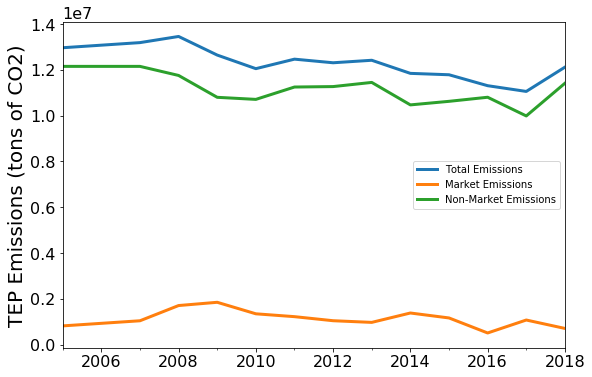

In [11]:
ax = tep_emissions.plot()
ax.set_ylabel('TEP Emissions (tons of CO2)')

In [12]:
tep_emissions_TtC = tep_emissions / 1e12 / c_to_co2

Text(0, 0.5, 'TEP Emissions (Tt C)')

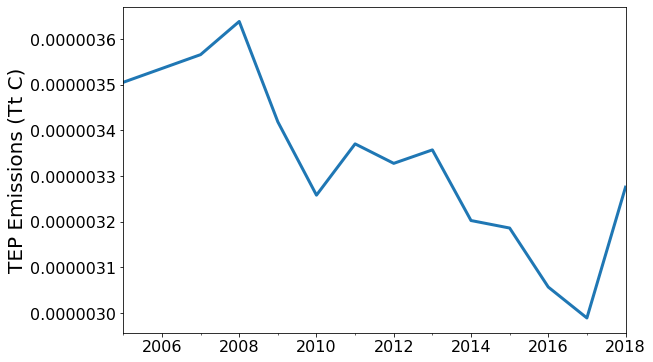

In [13]:
ax = tep_emissions_TtC['Total Emissions'].plot()
ax.set_ylabel('TEP Emissions (Tt C)')

In [14]:
tep_cumulative_emissions_TtC = tep_emissions_TtC.cumsum()

Text(0, 0.5, 'Cumulative TEP Emissions (Tt C)')

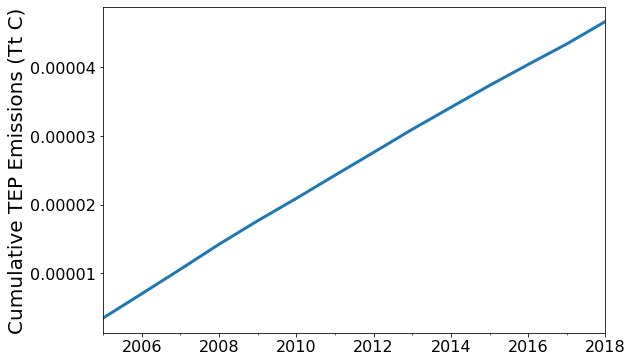

In [15]:
ax = tep_cumulative_emissions_TtC['Total Emissions'].plot()
ax.set_ylabel('Cumulative TEP Emissions (Tt C)')

Text(0, 0.5, 'Absolute TEP Delta T (degrees C)')

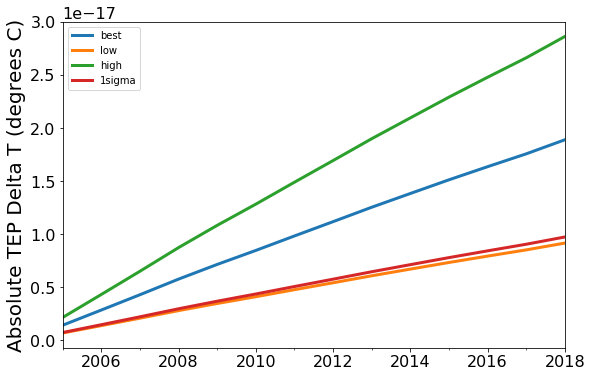

In [16]:
# surely there's a more elegant way to do this
tep_degrees_c = {k: ccr * tep_cumulative_emissions_TtC['Total Emissions'] / metric_ton_to_short_ton for k, ccr in tcre_tons_co2_ipcc2013.iteritems()}
tep_degrees_c = pd.DataFrame(tep_degrees_c)

ax = tep_degrees_c.plot()
ax.set_ylabel('Absolute TEP Delta T (degrees C)')

In [17]:
# https://www.eia.gov/energyexplained/electricity/electricity-in-the-us-generation-capacity-and-sales.php
us_generation_path = root_path / 'generation-major-source.csv'
us_generation = pd.read_csv(
    us_generation_path,
    skiprows=5,
    index_col=0
)
us_generation.index = pd.to_datetime(us_generation.index, format='%Y')
us_generation *= 1e6  # convert from billion kWh (1e9 * 1e3 = 1e12 = 1 TWh) to MWh (1e6)
us_generation['total'] = us_generation.sum(axis=1)
us_generation

,coal,natural gas,nuclear,renewables,petroleum and other,total
1950-01-01,1.550000e+08,4.500000e+07,0.0,101000000.0,34000000.0,3.350000e+08
1951-01-01,1.850000e+08,5.700000e+07,0.0,105000000.0,29000000.0,3.760000e+08
1952-01-01,1.950000e+08,6.800000e+07,0.0,110000000.0,30000000.0,4.030000e+08
1953-01-01,2.190000e+08,8.000000e+07,0.0,110000000.0,38000000.0,4.470000e+08
1954-01-01,2.390000e+08,9.400000e+07,0.0,112000000.0,32000000.0,4.770000e+08
...,...,...,...,...,...,...
2014-01-01,1.582000e+09,1.127000e+09,797000000.0,539000000.0,50000000.0,4.095000e+09
2015-01-01,1.352000e+09,1.333000e+09,797000000.0,544000000.0,50000000.0,4.076000e+09
2016-01-01,1.239000e+09,1.378000e+09,806000000.0,609000000.0,44000000.0,4.076000e+09
2017-01-01,1.206000e+09,1.296000e+09,805000000.0,687000000.0,40000000.0,4.034000e+09


Text(0, 0.5, 'US Generation (MWh)')

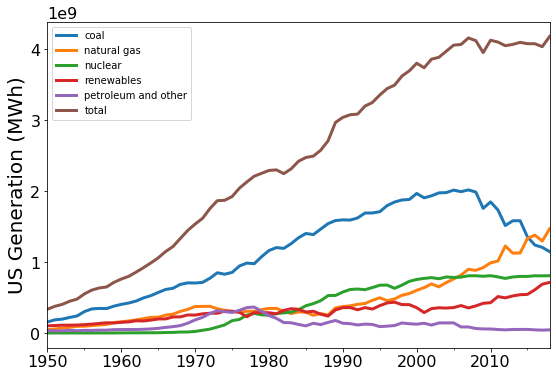

In [18]:
ax = us_generation.plot()
ax.set_ylabel('US Generation (MWh)')

In [19]:
tep_generation_fraction = tep_generation['Total Generation'] / us_generation['total']

Text(0.5, 1.0, 'TEP fraction of US Generation')

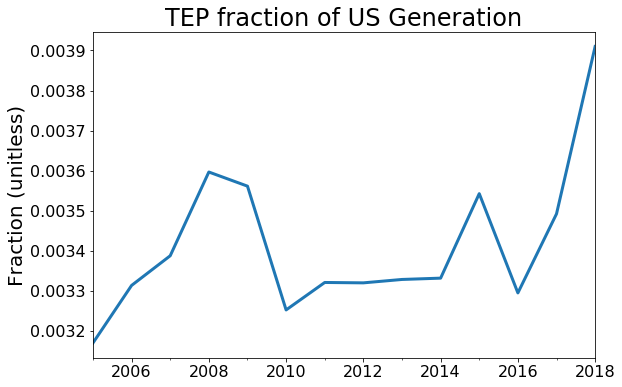

In [20]:
ax = tep_generation_fraction.dropna().plot()
ax.set_ylabel('Fraction (unitless)')
ax.set_title('TEP fraction of US Generation')

Text(0.5, 1.0, 'US like TEP Delta T')

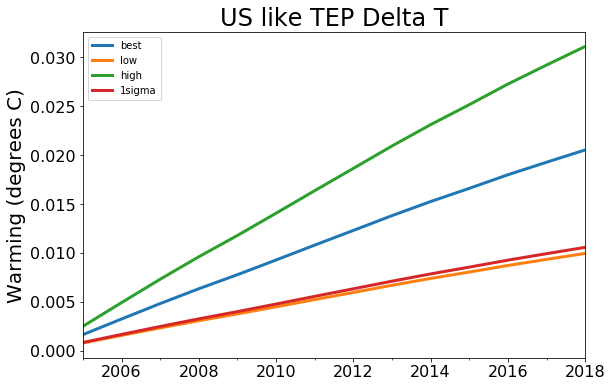

In [21]:
# need to use div to avoid broadcast
us_like_tep_emissions_TtC = tep_emissions_TtC.div(tep_generation_fraction.dropna(), axis=0)
us_like_tep_cumulative_emissions_TtC = us_like_tep_emissions_TtC.cumsum()

# surely there's a more elegant way to do this
us_like_tep_degrees_c = {k: ccr * us_like_tep_cumulative_emissions_TtC['Total Emissions'] / metric_ton_to_short_ton for k, ccr in tcre_ipcc2013.iteritems()}
us_like_tep_degrees_c = pd.DataFrame(us_like_tep_degrees_c)

ax = us_like_tep_degrees_c.plot()
ax.set_ylabel('Warming (degrees C)')
ax.set_title('US like TEP Delta T')

In [22]:
us_electric_carbon_2014 = 2040  # million metric tons
us_all_carbon_2014 = 5410
us_electric_carbon_fraction = us_electric_carbon_2014 / us_all_carbon_2014
us_electric_carbon_fraction

0.37707948243992606

Text(0.5, 1.0, 'US All Sectors like TEP Delta T')

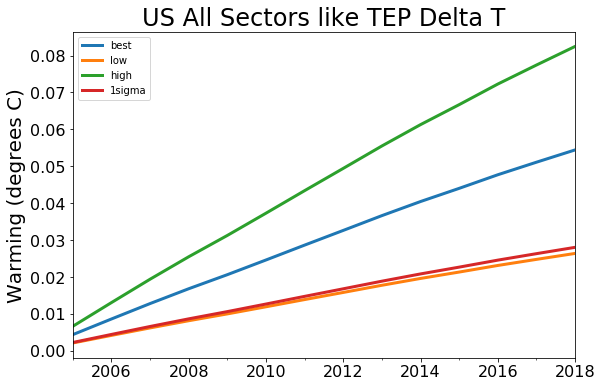

In [23]:
# this is a bad assumption for future projections!!! need to go other way and determine US electric budget instead
us_all_sectors_like_tep = us_like_tep_degrees_c / us_electric_carbon_fraction

ax = us_all_sectors_like_tep.plot()
ax.set_ylabel('Warming (degrees C)')
ax.set_title('US All Sectors like TEP Delta T')

In [24]:
# https://www.eia.gov/beta/states/states/az/rankings
# site also has energy consumption per capita, production, electric gen
us_state_carbon_path = root_path / 'us_state_carbon_emissions_2017.csv'
us_state_carbon = pd.read_csv(
    us_state_carbon_path,
    skiprows=4,
    index_col=0
)
# units of million metric tons of CO2
us_state_carbon

,Ranking,Value
State,,
TX,1,707.0
CA,2,359.0
FL,3,227.0
LA,4,226.0
PA,5,215.0
OH,6,204.0
IL,7,201.0
IN,8,176.0
NY,9,157.0


In [25]:
# https://www.eia.gov/beta/states/states/az/data/dashboard/total-energy

In [26]:
# https://www.eia.gov/beta/states/states/az/data/dashboard/electricity

In [27]:
def read_portfolio(path):
    name = path.name.split('-')[1].split('.')[0].lstrip(' ')
    
    usecols = 'D:AI'
    
    # units of MW changes
    changes = pd.read_excel(
        path,
        skiprows=5,
        nrows=4,
        index_col=0,
        usecols=usecols
    ).T

    # units of GWh
    energy = pd.read_excel(
        path,
        skiprows=13,
        nrows=18,
        index_col=0,
        usecols=usecols
    ).dropna().T

    # units of thousands of $
    financial = pd.read_excel(
        path,
        skiprows=35,
        nrows=2,
        index_col=0,
        usecols=usecols
    ).T

    # units of thousands of $
    environmental = pd.read_excel(
        path,
        skiprows=41,
        nrows=7,
        index_col=0,
        usecols=usecols
    ).dropna().T
    
    return name, changes, energy, financial, environmental

In [28]:
portfolio = 'P01aL1M1E1'
path = root_path / f'Portfolio Summary - {portfolio}.xlsx'
name, changes, energy, financial, environmental = read_portfolio(path)

Text(0, 0.5, 'Total CO2 Emissions (Short Tons)')

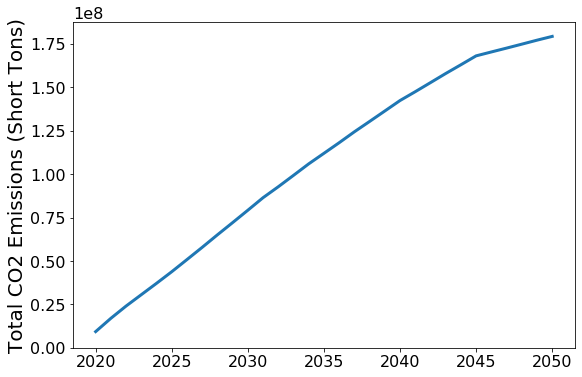

In [29]:
fig, ax = plt.subplots()
environmental.cumsum()['Total CO2 Emissions, Tons'].plot(ax=ax)
ax.set_ylim(0, None)
ax.set_ylabel('Total CO2 Emissions (Short Tons)')

Following Rogelj 2019, the global carbon budget $B_{lim}$ can be calculated as

\begin{equation*}
B_{lim} = \frac{T_{lim} - T_{hist} - T_{nonCO2} - T_{ZEC}}{TCRE} - E_{sfb}
\end{equation*}

where $T_{lim}$ is the target level (e.g. 1.5 C), $T_{hist}$ is the amount of historical warming since the preindustrial period, $T_{nonCO2}$ is the amount of warming from non-CO2 forcing, $T_{ZEC}$ is the zero-emissions commitment, $TCRE$ is the amount of warming for each unit of cumulative carbon emissions, and $E_{sfb}$ is the additional Earth system feedback. 

It is convenient to group the temperature terms into a remaining allowable temperature

\begin{equation*}
T_{rem} = T_{lim} - T_{hist} - T_{nonCO2} - T_{ZEC}
\end{equation*}

Then $B_{lim}$ becomes

\begin{equation*}
B_{lim} = \frac{T_{rem}}{TCRE} - E_{sfb}
\end{equation*}

Rogelj 2019 (and others?) assume that the uncertainty in $B_{lim}$ is dominated by uncertainty in $TCRE$ and apply the following formulation:

\begin{equation*}
B_{lim_{50}} = \frac{T_{rem}}{TCRE_{50}} - E_{sfb} \\
B_{lim_{66}} = \frac{T_{rem}}{TCRE_{33}} - E_{sfb} \\
B_{lim_{33}} = \frac{T_{rem}}{TCRE_{66}} - E_{sfb}
\end{equation*}

where 33, 50, and 66 represent the percentiles of $TCRE$ and $B_{lim}$.

If the uncertainty of other terms cannot be ignored, then we can use standard [propagation of uncertainty](https://en.wikipedia.org/wiki/Propagation_of_uncertainty) to derive the uncertainty of $B_{lim}$. First, the uncertainty in $T_{rem}$ is approximated by

\begin{equation*}
\sigma_{T_{rem}} = \sqrt{ \sigma_{T_{hist}}^2 + \sigma_{T_{nonCO2}}^2 + \sigma_{T_{ZEC}}^2 }
\end{equation*}

Then, the uncertainty in $B_{lim}$ is approximated by

\begin{equation*}
\sigma_{B_{lim}} = \sqrt{ \left(\frac{T_{rem}}{TCRE}\right)^2 \left(\left(\frac{\sigma_{T_{rem}}}{T_{rem}}\right)^2 + \left(\frac{\sigma_{TCRE}}{TCRE}\right)^2\right) + \sigma_{E_{sfb}}^2 }
\end{equation*}

The propagation of uncertainty described above is based on a first order Taylor series expansion of the function. The accuracy of the uncertainty estimate depends on the error of the first order Taylor series evaluated at the limit of the uncertainty. $B_{lim}$ is inversely proportional to $TCRE$, so the first order expansion could be a poor approximation when the $TCRE$ uncertainty is large. More study is needed to determine if $\sigma_{B_{lim}}$ is more accurately determined through only percentiles of $TCRE$ or through a full propagation of uncertainty for all terms. From a quick inspection, $\sigma_{T_{rem}} \approx 0.2$ C, so $(\sigma_{T_{rem}} / T_{rem})^2 \approx 0.16, 0.04$ (1.5 C or 2.0 C targets, respectively). Compare this to $(\sigma_{TCRE} / {TCRE})^2 \approx 0.05$. So uncertainty in $T_{rem}$ is not negligible compared to the uncertainty in $TCRE$ and Rogelj 2019's exclusive use of $TCRE$ uncertainty is questionable. As for $\sigma_{E_{sfb}}$, it is comparable to $E_{sfb}$, but this is only about 20% of the size of the $T_{rem}/TCRE$ term. The Taylor-series propgation of uncertainty approach always produces symmetrical error bars, whereas directly propagating only the $TCRE$ uncertainty following Rogelj 2019 leads to asymmetrical error bars. The most conservative approach may be to calculate the error bars using both approaches and take the largest.

The TEP carbon budget $B_{TEP}$ can be calculated as

\begin{equation*}
B_{TEP} = B_{lim} F_{US} F_{USElec} F_{TEP}
\end{equation*}

where $F_{US}$ is the fraction of cumulative global emissions allocated to the United States, $F_{USElec}$ is the fraction of the U.S. cumulative emissions allocated to the electricity sector, and $F_{TEP}$ is the fraction of the U.S. electricity sector's cumulative emissions allocated to TEP. The Taylor series expansion concerns are less relevant here because $B_{TEP}$ is simply proportional to each term.

The uncertainty in $B_{TEP}$ is approximated by

\begin{equation*}
\sigma_{B_{TEP}} = B_{TEP} \sqrt{ \left( \frac{\sigma_{B_{lim}}}{B_{lim}} \right)^2 + \left( \frac{\sigma_{F_{US}}}{F_{US}} \right)^2 + \left( \frac{\sigma_{F_{USElec}}}{F_{USElec}} \right)^2 + \left( \frac{\sigma_{F_{TEP}}}{F_{TEP}} \right)^2 }
\end{equation*}

In [46]:
def calc_carbon_budget_globe(
        target, 
        transient_climate_response,
        historical_warming=0.97, 
        non_CO2_temperature_effect=None,
        zero_emissions_commitment_effect=0,
        earth_system_feedback=100e9,
        emissions_since_historical=289.8e9,
    ):
    """Calculate global carbon budget for global temperature change
    above preindustrial period. Uncertainty is not explicitly 
    accounted for, but may be empirically determined by supplying 
    array or Series inputs for the parameters.
    
    Parameters
    ----------
    target : float
        Global temperature change target.
    transient_climate_response : float
        The global mean amount of warming for each unit of 
        cumulative carbon emissions. 
    historical_warming : float
        Degrees change over a preindustrial period. 
    non_CO2_temperature_effect : None or tuple of float
        Account for warming due to non-CO2 forcing such as
        sulfur dioxide. 2nd element is the uncertainty.
        If None, set based on target.
    zero_emissions_commitment_effect : float
        Account for nonlinearity or time lag of TCRE
    earth_system_feedback : float
        Account for feedback from changes such as melting 
        of permafrost.
    emissions_since_historical : float
        Additional emissions since the period defined by
        historical_warming.
    
    Returns
    -------
    budget : array_like
    
    Notes
    -----
    Default values from Rogelj et al (2019) and 
    Rogelj et al (2020) correction
    """
    
    # account for warming due to non-CO2 forcing
    # e.g. changes in sulfur dioxide associated with changing fuel mixes
    if non_CO2_temperature_effect is None:
        if target < 2.0:
            non_CO2_temperature_effect = 0.1366  # degrees C (0 - 0.2 C 90% range) if target = 1.5 C
        else:
            non_CO2_temperature_effect = 0.2221  # degrees C (0.1 - 0.4 C 90% range) if target = 2 C
    
    remaining_warming = (
        target 
        - historical_warming 
        - non_CO2_temperature_effect 
        - zero_emissions_commitment_effect
    )

    print('remaining warming:', remaining_warming)
    
    budget_remaining = remaining_warming / transient_climate_response

    print('budget remaining:', budget_remaining)

    carbon_budget_globe = budget_remaining - earth_system_feedback - emissions_since_historical

    print('budget:', carbon_budget_globe)

    return carbon_budget_globe

In [47]:
calc_carbon_budget_globe(1.5, tcre_tons_co2_rogel2019.loc[['best', 'low', 'high']]) / 1e9

remaining warming: 0.3934
budget remaining: best    8.736398e+11
low     1.129486e+12
high    7.121651e+11
dtype: float64
budget: best    4.838398e+11
low     7.396861e+11
high    3.223651e+11
dtype: float64


best    483.839796
low     739.686075
high    322.365098
dtype: float64

In [48]:
calc_carbon_budget_globe(2.0, tcre_tons_co2_rogel2019.loc[['best', 'low', 'high']]) / 1e9

remaining warming: 0.8079000000000001
budget remaining: best    1.794137e+12
low     2.319552e+12
high    1.462527e+12
dtype: float64
budget: best    1.404337e+12
low     1.929752e+12
high    1.072727e+12
dtype: float64


best    1404.337242
low     1929.752110
high    1072.727154
dtype: float64

In [55]:
def calc_carbon_budget_globe_unc(
        target, 
        transient_climate_response,
        transient_climate_response_unc,
        historical_warming=0.97, 
        historical_warming_unc=0,
        non_CO2_temperature_effect=None,
        zero_emissions_commitment_effect=0,
        zero_emissions_commitment_effect_unc=0,
        earth_system_feedback=100e9,
        earth_system_feedback_unc=100e9,
        emissions_since_historical=289.8e9,
        emissions_since_historical_unc=0
    ):
    """Calculate global carbon budget for global temperature change
    above preindustrial period. Use propagation of error to determine
    uncertainty of the budget.
    
    Parameters
    ----------
    target : float
        Global temperature change target.
    transient_climate_response : float
        The global mean amount of warming for each unit of 
        cumulative carbon emissions. 
    transient_climate_response_unc : float
        TCRE uncertainty. Same units as TCRE.
    historical_warming : float
        Degrees change over a preindustrial period. 
    historical_warming_unc : float
    non_CO2_temperature_effect : None or tuple of float
        Account for warming due to non-CO2 forcing such as
        sulfur dioxide. 2nd element is the uncertainty.
        If None, set based on target.
    zero_emissions_commitment_effect : float
        Account for nonlinearity or time lag of TCRE
    zero_emissions_commitment_effect_unc : float
    earth_system_feedback : float
        Account for feedback from changes such as melting 
        of permafrost.
    earth_system_feedback_unc : float
    emissions_since_historical : float
        Additional emissions since the period defined by
        historical_warming.
    emissions_since_historical_unc : float
    
    Returns
    -------
    budget : float
    uncertainty : float
    
    Notes
    -----
    Default values from Rogelj et al (2019) and 
    Rogelj et al (2020) correction
    """
    
    # account for warming due to non-CO2 forcing
    # e.g. changes in sulfur dioxide associated with changing fuel mixes
    if non_CO2_temperature_effect is None:
        if target < 2.0:
            non_CO2_temperature_effect = 0.1366  # degrees C (0 - 0.2 C 90% range) if target = 1.5 C
            non_CO2_temperature_effect_unc = 0.050  # guessing at 1 sigma
        else:
            non_CO2_temperature_effect = 0.2221  # degrees C (0.1 - 0.4 C 90% range) if target = 2 C
            non_CO2_temperature_effect_unc = 0.075  # guessing at 1 sigma
        # non_CO2_temperature_effect_unc = 0  # according to Rogelj et al (2020) correction
    
    remaining_warming = (
        target 
        - historical_warming 
        - non_CO2_temperature_effect 
        - zero_emissions_commitment_effect
    )
    remaining_warming_unc = np.sqrt(
        historical_warming_unc ** 2 + 
        non_CO2_temperature_effect_unc ** 2 + 
        zero_emissions_commitment_effect_unc ** 2
    )
    print('remaining warming:', remaining_warming, remaining_warming_unc)
    
    budget_remaining = remaining_warming / transient_climate_response
    budget_remaining_unc = budget_remaining * np.sqrt(
        (remaining_warming_unc / remaining_warming) ** 2 +
        (transient_climate_response_unc / transient_climate_response) ** 2
    )
    print('budget remaining:', budget_remaining, budget_remaining_unc)

    carbon_budget_globe = budget_remaining - earth_system_feedback - emissions_since_historical
    carbon_budget_globe_unc = np.sqrt(
        budget_remaining_unc ** 2 + 
        earth_system_feedback_unc ** 2 + 
        emissions_since_historical_unc ** 2
    )
    print('budget:', carbon_budget_globe, carbon_budget_globe_unc)

    carbon_budget_globe = pd.Series(
        [carbon_budget_globe, 
         carbon_budget_globe - carbon_budget_globe_unc, 
         carbon_budget_globe + carbon_budget_globe_unc, 
         carbon_budget_globe_unc],
        index=['best', 'low', 'high', '1sigma']
    )
    return carbon_budget_globe

In [56]:
calc_carbon_budget_globe_unc(
    1.5, tcre_tons_co2_rogel2019['best'], tcre_tons_co2_rogel2019['1sigma']) / 1e9

remaining warming: 0.3934 0.05
budget remaining: 873639795691.7612 227085304474.3408
budget: 483839795691.7612 248128465735.40097


best      483.839796
low       235.711330
high      731.968261
1sigma    248.128466
dtype: float64

In [57]:
calc_carbon_budget_globe_unc(
    2.0, tcre_tons_co2_rogel2019['best'], tcre_tons_co2_rogel2019['1sigma']) / 1e9

remaining warming: 0.8079000000000001 0.075
budget remaining: 1794137241838.7744 439574662357.9015
budget: 1404337241838.7744 450805816052.83563


best      1404.337242
low        953.531426
high      1855.143058
1sigma     450.805816
dtype: float64

In [58]:
# take global values directly from paper for comparison with values calculated above
carbon_budget_globe_15_rogelj2019 = pd.Series([480, 320, 740], index=['best', 'low', 'high']) * 1e9
carbon_budget_globe_20_rogelj2019 = pd.Series([1400, 1930, 1070], index=['best', 'low', 'high']) * 1e9

In [78]:
def calc_carbon_budget_tep(carbon_budget_globe, transient_climate_response):
    """
    Parameters
    ----------
    target : array_like
        Global temperature change target.
        
    Returns
    -------
    array_like
        TEP carbon budget in short tons
    """
    carbon_budget_globe = calc_carbon_budget_globe(target, transient_climate_response)
    if target == 1.5:
        carbon_budget_globe = carbon_budget_globe_15_rogelj2019
    elif target == 2.0:
        carbon_budget_globe = carbon_budget_globe_20_rogelj2019
    carbon_budget_us = carbon_budget_globe * (325 / 7700)  # assume budget based on % populuation
    carbon_budget_us = carbon_budget_globe * 0.07  # assume budget based INDC estimates (PROVISIONAL)
    carbon_budget_us_electric = carbon_budget_us * 0.3  # wild guess
    carbon_budget_tep = carbon_budget_us_electric * 0.0035  # avg fraction of generation over last 10 years
    carbon_budget_tep *= metric_ton_to_short_ton  # TEP data is in short tons
    return carbon_budget_tep

carbon_budget_tep_15 = calc_carbon_budget_tep(1.5, tcre_tons_co2_ipcc2013)
carbon_budget_tep_15

0.43000000000000005
best    4.459459e-13
low     2.162162e-13
high    6.756757e-13
dtype: float64


best    38889496.8
low     25926331.2
high    59954640.9
dtype: float64

In [79]:
carbon_budget_tep_20 = calc_carbon_budget_tep(2.0, tcre_tons_co2_ipcc2013)
carbon_budget_tep_20

0.8300000000000001
best    4.459459e-13
low     2.162162e-13
high    6.756757e-13
dtype: float64


best    1.134277e+08
low     1.563682e+08
high    8.669117e+07
dtype: float64

In [80]:
carbon_budgets_tep = pd.DataFrame({k: calc_carbon_budget_tep(k, tcre_tons_co2_ipcc2013) for k in (1.5, 2.0, 2.5)})
carbon_budgets_tep

0.43000000000000005
best    4.459459e-13
low     2.162162e-13
high    6.756757e-13
dtype: float64
0.8300000000000001
best    4.459459e-13
low     2.162162e-13
high    6.756757e-13
dtype: float64
1.33
best    4.459459e-13
low     2.162162e-13
high    6.756757e-13
dtype: float64


,1.5,2.0,2.5
best,38889496.8,1.134277e+08,2.335334e+08
low,25926331.2,1.563682e+08,1.132283e+08
high,59954640.9,8.669117e+07,3.538385e+08


In [81]:
carbon_budgets_tep.to_csv(root_path / 'carbon_budgets.csv', index_label='estimate')

In [82]:
cumulative = environmental.cumsum()['Total CO2 Emissions, Tons']

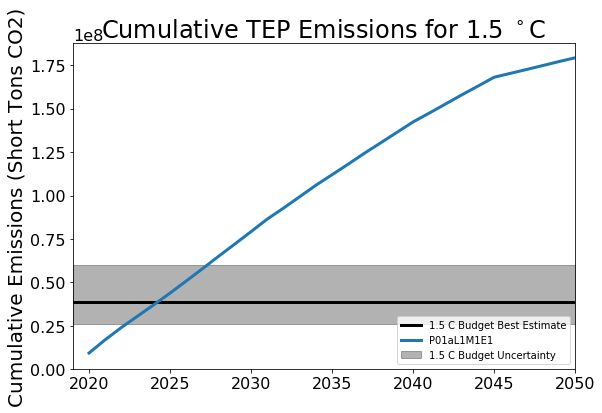

In [83]:
def cumulative_plot(carbon_budget_tep, target):
    fig, ax = plt.subplots()
    color = 'k'
    ax.axhline(carbon_budget_tep['best'], label=f'{target} C Budget Best Estimate', color=color)
    ax.fill_between((cumulative.index[0] - 1, cumulative.index[-1] + 1), carbon_budget_tep['low'], carbon_budget_tep['high'], color=color, alpha=0.3, label=f'{target} C Budget Uncertainty')
    ax.set_xlim(cumulative.index[0] - 1, cumulative.index[-1])
    ax.set_ylabel('Cumulative Emissions (Short Tons CO2)')
    ax.set_title(f'Cumulative TEP Emissions for {target} $^\circ$C')
    return fig, ax

target = 1.5
fig, ax = cumulative_plot(carbon_budgets_tep[target], 1.5)
ax.plot(cumulative.index, cumulative.values, zorder=10, label=name)
ax.set_ylim(0, None)
ax.legend(loc=4)

In [84]:
portfolios = root_path.glob('Portfolio Summary - P*.xlsx')

cumulatives = {}
for portfolio in portfolios:
    print(portfolio)
    name, changes, energy, financial, environmental = read_portfolio(portfolio)
    cumulative = environmental.cumsum()['Total CO2 Emissions, Tons']
    cumulatives[name] = cumulative
    
cumulatives = pd.DataFrame(cumulatives)

/Users/holmgren/Documents/Renewables/TEP/TEP 2019 Carbon/data/Portfolio Summary - P16aL1M1E1.xlsx
/Users/holmgren/Documents/Renewables/TEP/TEP 2019 Carbon/data/Portfolio Summary - P06aL1M1E1.xlsx
/Users/holmgren/Documents/Renewables/TEP/TEP 2019 Carbon/data/Portfolio Summary - P02aL1M1E1.xlsx
/Users/holmgren/Documents/Renewables/TEP/TEP 2019 Carbon/data/Portfolio Summary - P01aL1M1E1.xlsx


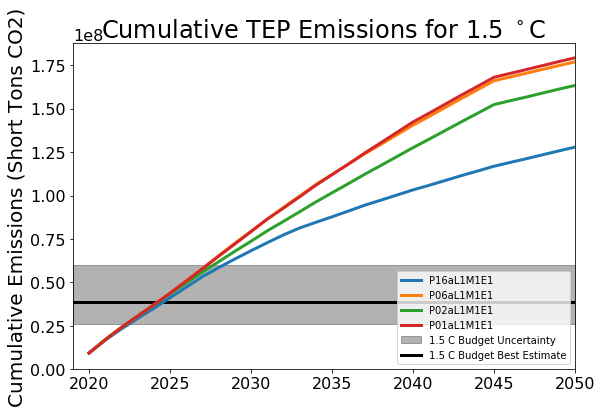

In [85]:
target = 1.5
fig, ax = cumulative_plot(carbon_budgets_tep[target], target)

for name, cumulative in cumulatives.items():
    ax.plot(cumulative.index, cumulative.values, zorder=10, label=name)

ax.set_ylim(0, None)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[1:] + [handles[0]], labels[1:] + [labels[0]], loc=4)

fig.savefig(root_path / f'portfolios_{target}C.png', dpi=300)

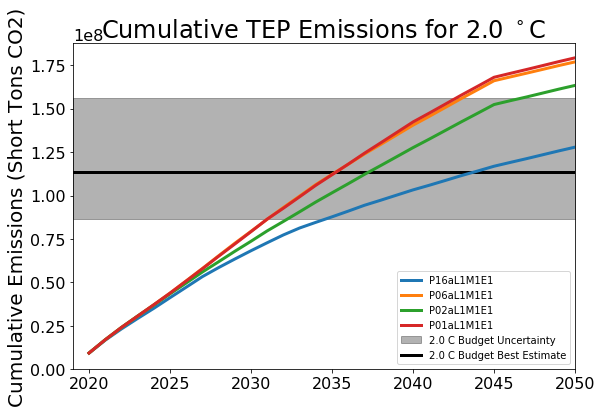

In [86]:
target = 2.0
fig, ax = cumulative_plot(carbon_budgets_tep[target], target)

for name, cumulative in cumulatives.items():
    ax.plot(cumulative.index, cumulative.values, zorder=10, label=name)

ax.set_ylim(0, None)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[1:] + [handles[0]], labels[1:] + [labels[0]], loc=4)

fig.savefig(root_path / f'portfolios_{target}C.png', dpi=300)

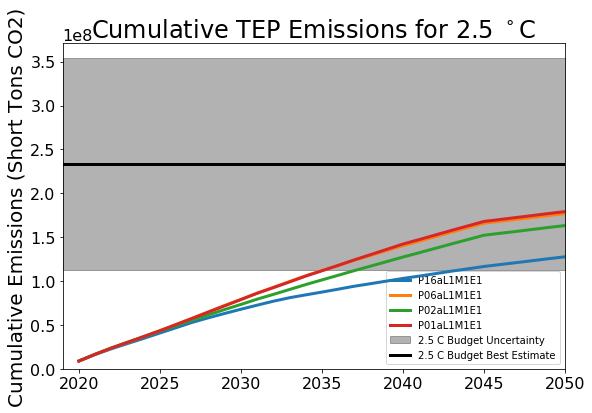

In [87]:
target = 2.5
fig, ax = cumulative_plot(carbon_budgets_tep[target], target)

for name, cumulative in cumulatives.items():
    ax.plot(cumulative.index, cumulative.values, zorder=10, label=name)

ax.set_ylim(0, None)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[1:] + [handles[0]], labels[1:] + [labels[0]], loc=4)

fig.savefig(root_path / f'portfolios_{target}C.png', dpi=300)

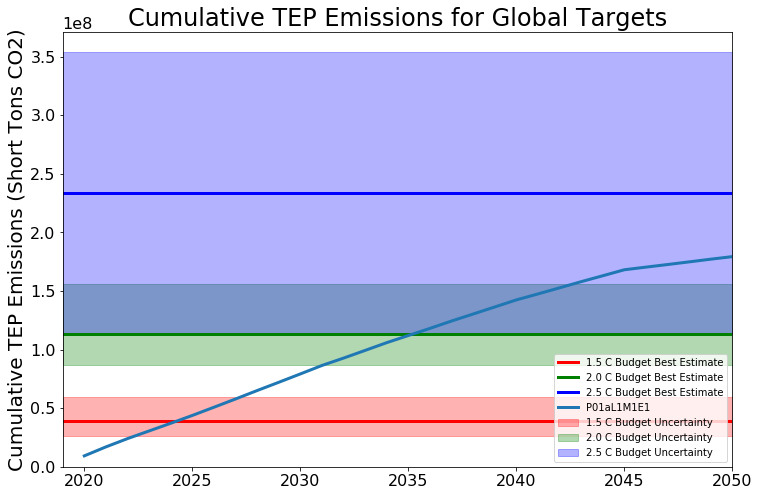

In [88]:
def cumulative_plot(carbon_budgets_tep):
    """
    Parameters
    ----------
    carbon_budget_tep : DataFrame
        
    """
    fig, ax = plt.subplots(figsize=(12, 8))
    finite_cy_iter = iter(cycler(color=['r', 'g', 'b']))
    for target, budget in carbon_budgets_tep.items():
        styles = dict(next(finite_cy_iter))
        ax.axhline(budget['best'], label=f'{target} C Budget Best Estimate', **styles)
        ax.fill_between((cumulative.index[0] - 1, cumulative.index[-1] + 1), budget['low'], budget['high'], alpha=0.3, label=f'{target} C Budget Uncertainty', **styles)
        ax.set_xlim(cumulative.index[0] - 1, cumulative.index[-1])
    ax.set_ylabel('Cumulative TEP Emissions (Short Tons CO2)')
    ax.set_title(f'Cumulative TEP Emissions for Global Targets')
    return fig, ax

fig, ax = cumulative_plot(carbon_budgets_tep)
ax.plot(cumulative.index, cumulative.values, zorder=10, label=name)
ax.set_ylim(0, None)
ax.legend(loc=4)

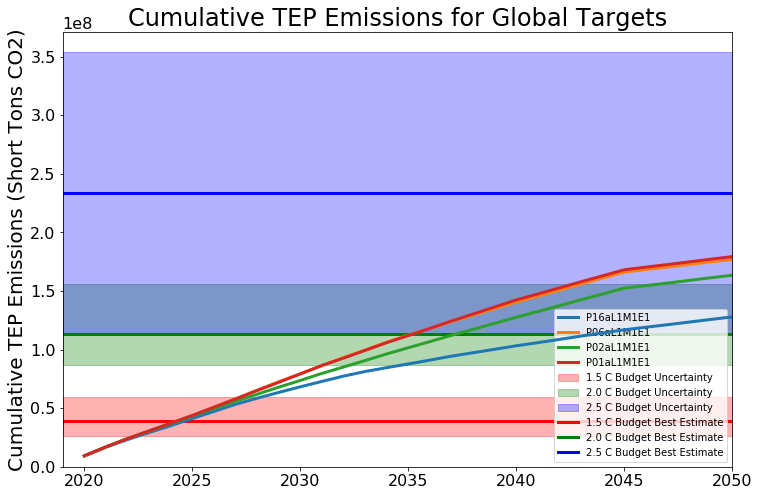

In [89]:
fig, ax = cumulative_plot(carbon_budgets_tep)

for name, cumulative in cumulatives.items():
    ax.plot(cumulative.index, cumulative.values, zorder=10, label=name)

ax.set_ylim(0, None)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[3:] + handles[0:3], labels[3:] + labels[0:3], loc=4)

fig.savefig(root_path / 'portfolios_1.5_2.0_2.5_C.png', dpi=300)